In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('heart.csv')
data.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.shape
print(f'There are {data.shape[0]} observations and {data.shape[-1]} variables')

There are 303 observations and 14 variables


### DATA CLEANING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


It can be seen from the data above that all variables are in their right data type and there are no missing values.

In [4]:
# Checking for duplicates
data.duplicated().sum()

1

In [5]:
# Removing duplicates
data = data[~data.duplicated()]
data.duplicated().sum()

0

All duplicates have been removed

In [6]:
data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholestoral',
       'fasting_blood_sugar', 'restecg', 'max_hr', 'exang', 'oldpeak', 'slope',
       'num_major_vessels', 'thal', 'target'],
      dtype='object')

In [7]:
cols = ['sex', 'chest_pain_type','fasting_blood_sugar', 'restecg','exang','slope','thal', 'target','num_major_vessels']
for i in cols:
    print(data[i].value_counts())
    print('-'*20)

sex
1    206
0     96
Name: count, dtype: int64
--------------------
chest_pain_type
0    143
2     86
1     50
3     23
Name: count, dtype: int64
--------------------
fasting_blood_sugar
0    257
1     45
Name: count, dtype: int64
--------------------
restecg
1    151
0    147
2      4
Name: count, dtype: int64
--------------------
exang
0    203
1     99
Name: count, dtype: int64
--------------------
slope
2    141
1    140
0     21
Name: count, dtype: int64
--------------------
thal
2    165
3    117
1     18
0      2
Name: count, dtype: int64
--------------------
target
1    164
0    138
Name: count, dtype: int64
--------------------
num_major_vessels
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64
--------------------


From the documentaion, thal has only three unique variables(1,2,3), therefore the unique variable 0 will be removed from the thal variable.

In [8]:
# Removing zero from the variable Thal
data = data[data['thal']>0]
data['thal'].value_counts()

thal
2    165
3    117
1     18
Name: count, dtype: int64

### EXPLORATORY DATA ANALYSIS

In [9]:
# Finding central tendencies
central_tendencies=data[['age','resting_bp','cholestoral','max_hr','oldpeak']].describe().T
central_tendencies.columns = [['count','mean','standard deviation','minimum','25th percentile','median','75th percentile','maximum']]
central_tendencies

,count,mean,standard deviation,minimum,25th percentile,median,75th percentile,maximum
age,300.0,54.433333,9.076720,29.0,47.75,56.0,61.0,77.0
resting_bp,300.0,131.626667,17.619557,94.0,120.00,130.0,140.0,200.0
cholestoral,300.0,246.743333,51.837514,126.0,211.00,241.5,275.0,564.0
max_hr,300.0,149.663333,22.889658,71.0,133.75,152.5,166.0,202.0
oldpeak,300.0,1.046667,1.163760,0.0,0.00,0.8,1.6,6.2


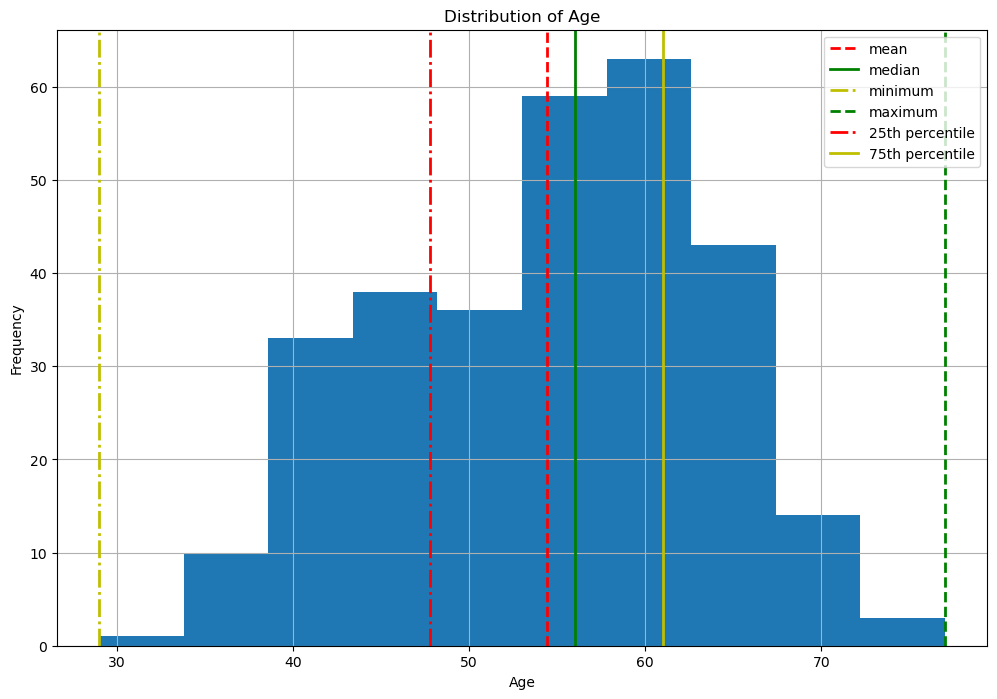

In [10]:
# Plotting a histogram of age variable
data.age.hist(figsize=(12,8))
mean = data.age.mean()
median = data.age.median()
minimum = data.age.min()
maximum = data.age.max()
percentile_25 = data.age.quantile(0.25)
percentile_75 = data.age.quantile(0.75)
plt.axvline(mean, color = 'r', linewidth=2, linestyle='--', label= 'mean')
plt.axvline(median, color = 'g', linewidth=2, linestyle='-', label= 'median')
plt.axvline(minimum, color = 'y', linewidth=2, linestyle='-.', label= 'minimum')
plt.axvline(maximum, color = 'g', linewidth=2, linestyle='--', label= 'maximum')
plt.axvline(percentile_25, color = 'r', linewidth=2, linestyle='-.', label= '25th percentile')
plt.axvline(percentile_75, color = 'y', linewidth=2, linestyle='-', label= '75th percentile')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.legend();

Since the data is left skewed, it can be seen from the graph that the median is higher than the mean. It can also be seen that 75 percent of the individuals are below the age of 62. Also, the individuals are between the ages of 29 and 77 inclusive.

In [11]:
# Finding the value count of sex variable
sex_data = data['sex'].apply(lambda x:"Female" if x == 0 else 'Male')
sex_data.value_counts()

sex
Male      205
Female     95
Name: count, dtype: int64

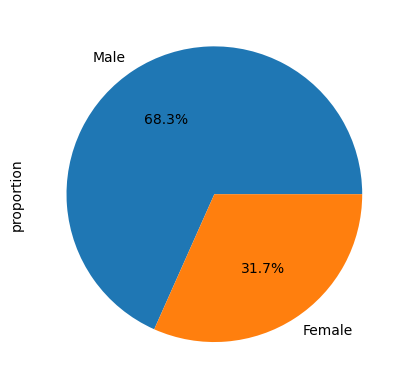

In [12]:
# Plotting a pie chart for sex variable
sex_data.value_counts(normalize = True).plot.pie(autopct = "%1.1f%%");

From the pie chart above, it can clearly be seen that there are more males than females with the proportion of males being about 68.3% and females being 31.7%

In [13]:
# Finding the value count of chest pain type
chest_pain = data['chest_pain_type'].replace({0:'Typical angina',1:' Atypical angina',2:' Non-anginal pain',3:'Asymptomatic'})
chest_pain.value_counts()

chest_pain_type
Typical angina       142
 Non-anginal pain     85
 Atypical angina      50
Asymptomatic          23
Name: count, dtype: int64

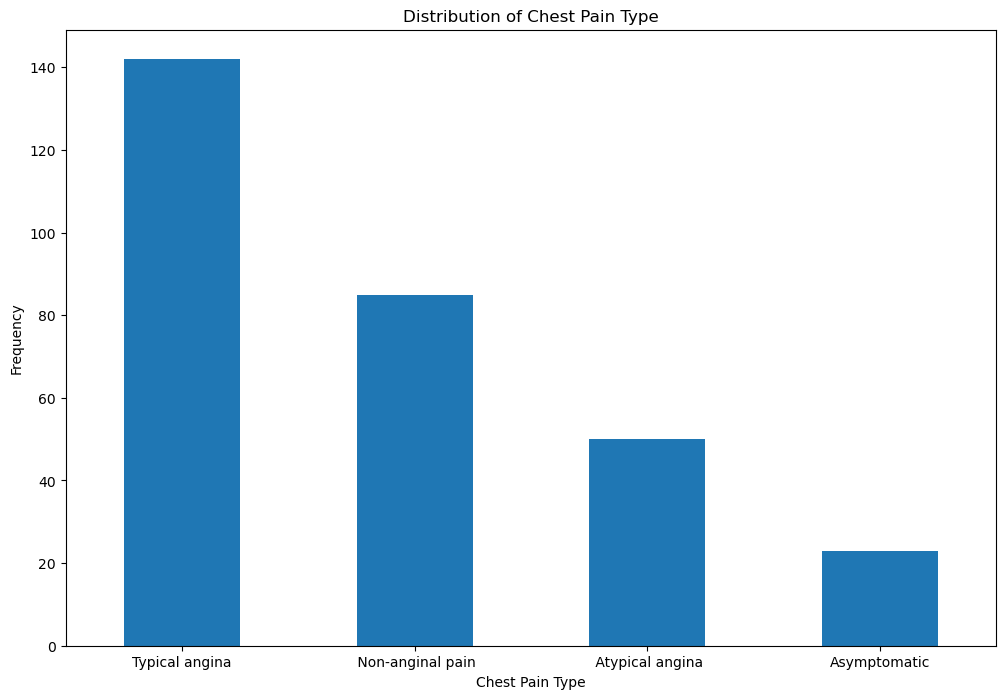

In [14]:
# Plotting a bar chart of chest pain type
chest_pain.value_counts().plot.bar(figsize=(12,8))
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.title("Distribution of Chest Pain Type")
plt.xticks(rotation=0);

From the graph, it can be seen that a mojority of individuals have typical angina,that is, chest pain associated with exercise or stress. Followed by non-anginal pain(pain not related to heart issues), then atypical angina(pain not typical for angina). The chest pain type with the least individuals is Asymptomatic(no chest pain).

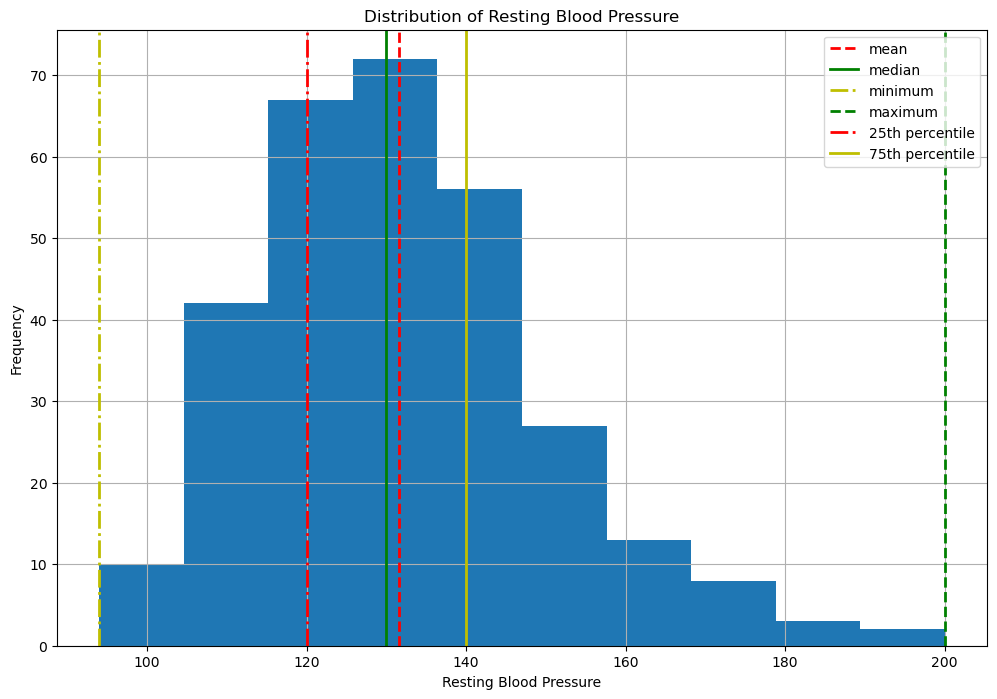

In [15]:
# Plotting a histogram of resting_bp variable
data.resting_bp.hist(figsize=(12,8))
mean = data.resting_bp.mean()
median = data.resting_bp.median()
minimum = data.resting_bp.min()
maximum = data.resting_bp.max()
percentile_25 = data.resting_bp.quantile(0.25)
percentile_75 = data.resting_bp.quantile(0.75)
plt.axvline(mean, color = 'r', linewidth=2, linestyle='--', label= 'mean')
plt.axvline(median, color = 'g', linewidth=2, linestyle='-', label= 'median')
plt.axvline(minimum, color = 'y', linewidth=2, linestyle='-.', label= 'minimum')
plt.axvline(maximum, color = 'g', linewidth=2, linestyle='--', label= 'maximum')
plt.axvline(percentile_25, color = 'r', linewidth=2, linestyle='-.', label= '25th percentile')
plt.axvline(percentile_75, color = 'y', linewidth=2, linestyle='-', label= '75th percentile')
plt.xlabel("Resting Blood Pressure")
plt.ylabel("Frequency")
plt.title("Distribution of Resting Blood Pressure")
plt.legend();

Since the data is right skewed, it can be seen from the graph that the mean is higher than the median. It can also be seen that a majority of individuals(75%) have resting blood pressure(Blood pressure when the individual is at rest) not more than 140 mm Hg upon admission to the hospital. Only a small number of people have blood pressure above 180 mm Hg.

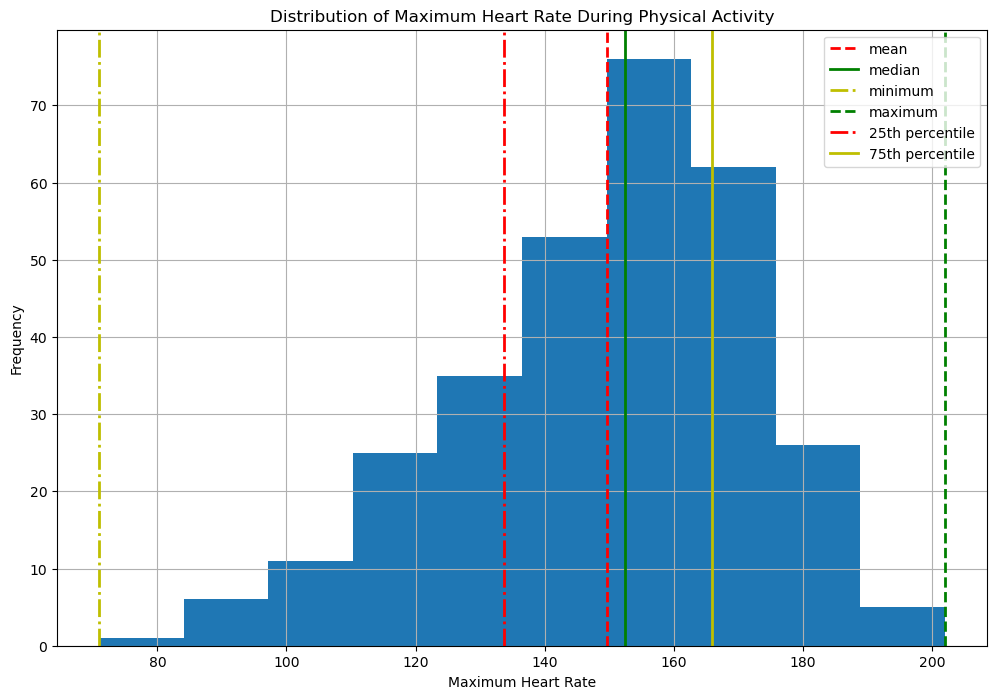

In [16]:
# Plotting a histogram of  variable
data.max_hr.hist(figsize=(12,8))
mean = data.max_hr.mean()
median = data.max_hr.median()
minimum = data.max_hr.min()
maximum = data.max_hr.max()
percentile_25 = data.max_hr.quantile(0.25)
percentile_75 = data.max_hr.quantile(0.75)
plt.axvline(mean, color = 'r', linewidth=2, linestyle='--', label= 'mean')
plt.axvline(median, color = 'g', linewidth=2, linestyle='-', label= 'median')
plt.axvline(minimum, color = 'y', linewidth=2, linestyle='-.', label= 'minimum')
plt.axvline(maximum, color = 'g', linewidth=2, linestyle='--', label= 'maximum')
plt.axvline(percentile_25, color = 'r', linewidth=2, linestyle='-.', label= '25th percentile')
plt.axvline(percentile_75, color = 'y', linewidth=2, linestyle='-', label= '75th percentile')
plt.xlabel("Maximum Heart Rate")
plt.ylabel("Frequency")
plt.title("Distribution of Maximum Heart Rate During Physical Activity")
plt.legend();

Since the data is left skewed, it can be seen from the graph that the median is higher than the mean. It can also be seen that about 75% of people reach a maximum heart rate of 166 when they are performing physical activities.

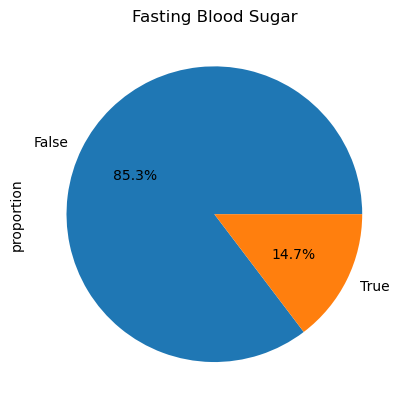

In [17]:
# Plotting a pie chart of fasting_blood_sugar 
fasting_blood_sugar_data = data['fasting_blood_sugar'].apply(lambda x:"False" if x == 0 else 'True')
fasting_blood_sugar_data.value_counts(normalize = True).plot.pie(autopct = "%1.1f%%")
plt.title('Fasting Blood Sugar');

True indicates that the resting blood sugar of the individual is above 120 mg/dl, and false for resting blood sugar of the individual is being below 120 mg/dl. From the pie chart, it can be seen that a high majority of people(85.1%) have resting blood sugar being below 120 mg/dl with 14.9% of people having resting blood being above 120 mg/dl.

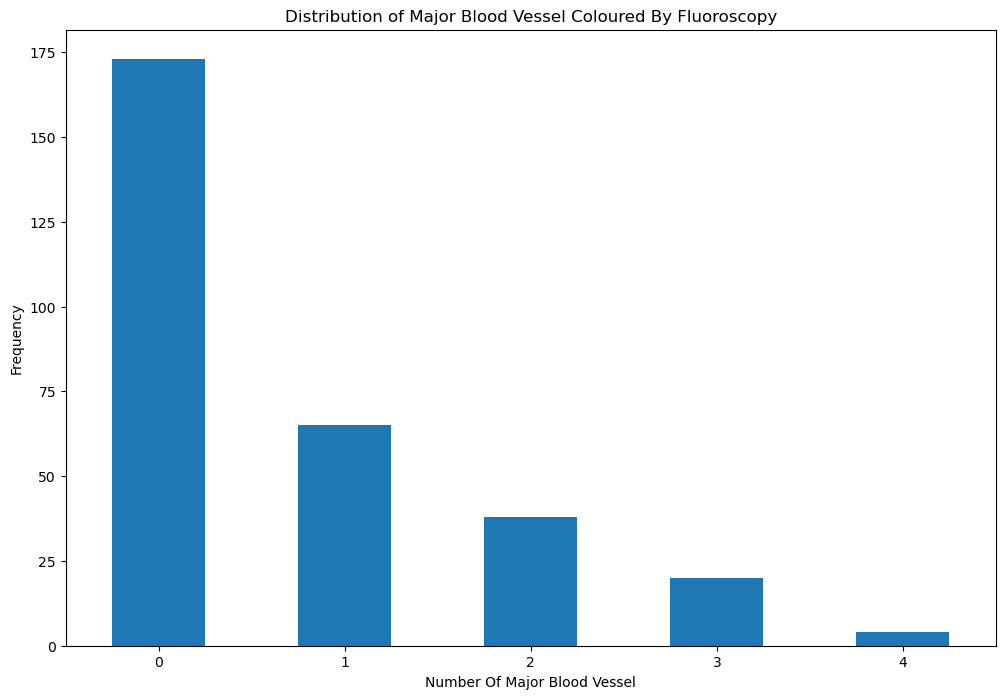

In [18]:
# Plotting a bar chart for num_major_vessels
data.num_major_vessels.value_counts().plot.bar(figsize=(12,8))
plt.xlabel("Number Of Major Blood Vessel")
plt.ylabel("Frequency")
plt.title("Distribution of Major Blood Vessel Coloured By Fluoroscopy")
plt.xticks(rotation=0);

From the bar chart above, it can clearly be seen that a majority of people have none of their major blood vessels coloured by fluoroscopy. Few individuals have 4 blood vessels coloured by fluoroscopy with 4 being the highest among all individuals. This indicate more severe coronary artery disease, as it suggests blockages since higher number of coloured blood vessels lead to higher severity of coronary artery disease.

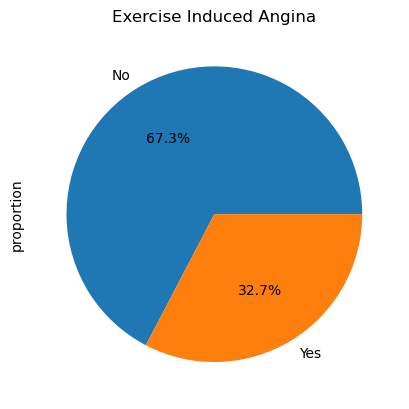

In [19]:
exang_data = data['exang'].apply(lambda x:"No" if x == 0 else 'Yes')
exang_data.value_counts(normalize = True).plot.pie(autopct = "%1.1f%%")
plt.title('Exercise Induced Angina');

From the plot, it can be seen that there are more people without exercise induced angina(67.3%) than those with exercise induced angina(32.7%)

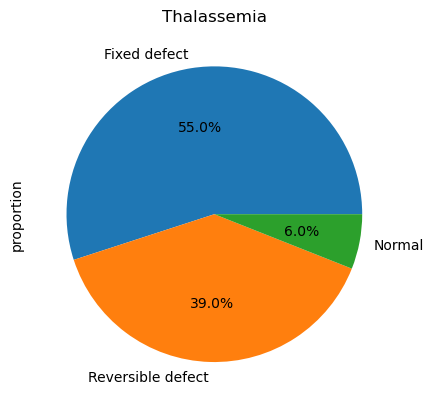

In [20]:
# Plotting a pie chart of thal variable
thal_data = data['thal'].replace({1:'Normal',2:'Fixed defect',3:'Reversible defect'})
thal_data.value_counts(normalize = True).plot.pie(autopct = "%1.1f%%")
plt.title('Thalassemia');

From the pie chart above, it can be seen that a majority of people have fixed defect,that is, they have permanent heart damage. 38.9% of the individuals have reversible defect and therefore their blood flow issues that can be addressed. Only 6% of peolpe have normal heart conditions.

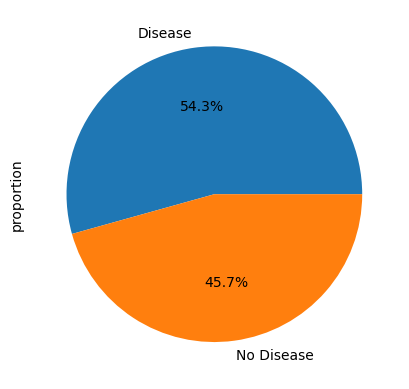

In [21]:
# Plotting a pie chart of target variable
target_data = data['target'].apply(lambda x:"No Disease" if x == 0 else 'Disease')
target_data.value_counts(normalize = True).plot.pie(autopct = "%1.1f%%");

From the pie chart above, it can be seen that a majority of people (54.3%) have heart disease whiles 45.7% of the people do not have heart disease.

In [22]:
# Finding the maximum heart rate for exang
data.groupby('exang')['max_hr'].max().sort_values()

exang
1    186
0    202
Name: max_hr, dtype: int64

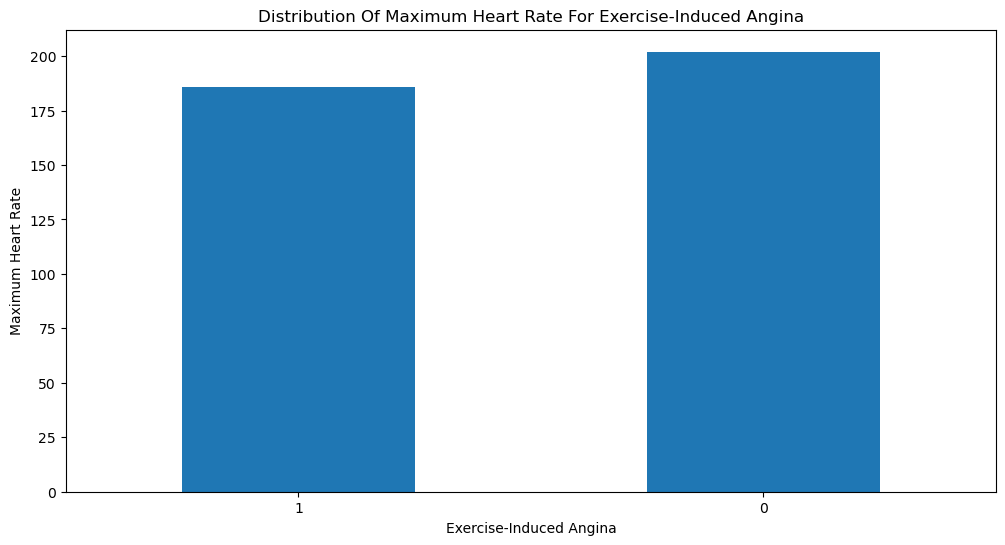

In [23]:
# Plotting the maximum heart rate for exang 
data.groupby('exang')['max_hr'].max().sort_values().plot.bar(figsize=(12,6))
plt.xlabel("Exercise-Induced Angina")
plt.ylabel("Maximum Heart Rate")
plt.title("Distribution Of Maximum Heart Rate For Exercise-Induced Angina")
plt.xticks(rotation=0);

1 indicates that the individual has exercise-induced angina and 0 indicates no exercise-induced angina. From the graph, it can be seen that among the people with exercise induced angina, the maximum heart rate during physical activities is 186 and among those with no exercise induced angina, the maximumheart rate is 202

In [24]:
# Finding the average resting blood pressure for fasting blood sugar
data.groupby('fasting_blood_sugar')['resting_bp'].mean().sort_values()

fasting_blood_sugar
0    130.304688
1    139.318182
Name: resting_bp, dtype: float64

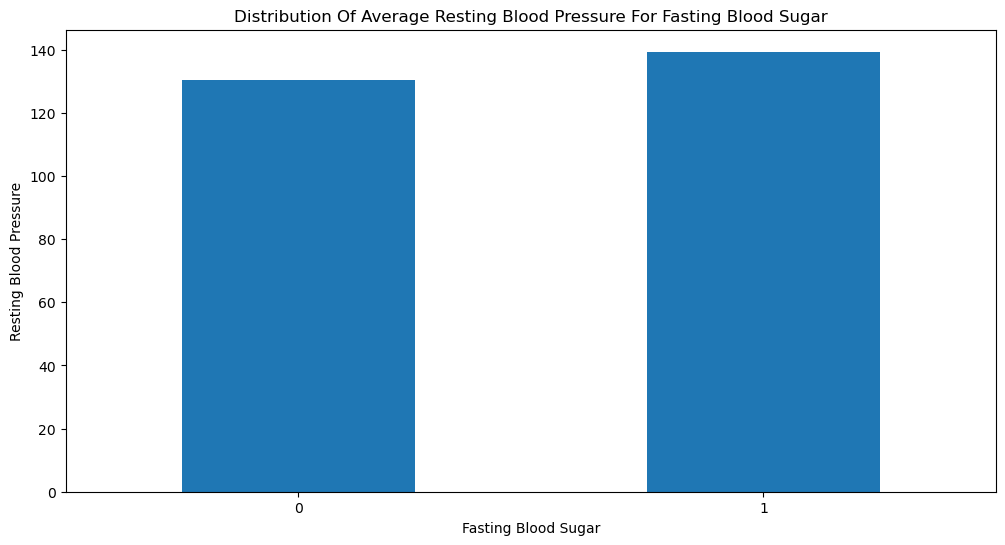

In [25]:
# Plotting the average resting blood pressure for fasting blood sugar
data.groupby('fasting_blood_sugar')['resting_bp'].mean().sort_values().plot.bar(figsize=(12,6))
plt.xlabel("Fasting Blood Sugar")
plt.ylabel("Resting Blood Pressure")
plt.title("Distribution Of Average Resting Blood Pressure For Fasting Blood Sugar")
plt.xticks(rotation=0);

The value 0 for fasting blood sugar represents blood sugar levels while fasting being below 120 mg/dl and 1 for blood sugar levels while fasting being above 120 mg/dl. From the graph, it can be seen that people with fasting blood sugar below 120 mg/dl have an average resting blood pressure of 130.304688. For those with fasting blood sugar above 120 mg/dl, the average resting blood sugar is 139.318182.

In [26]:
# Grouping target by sex
target_data.groupby(sex_data).value_counts()

sex     target    
Female  Disease        71
        No Disease     24
Male    No Disease    113
        Disease        92
Name: count, dtype: int64

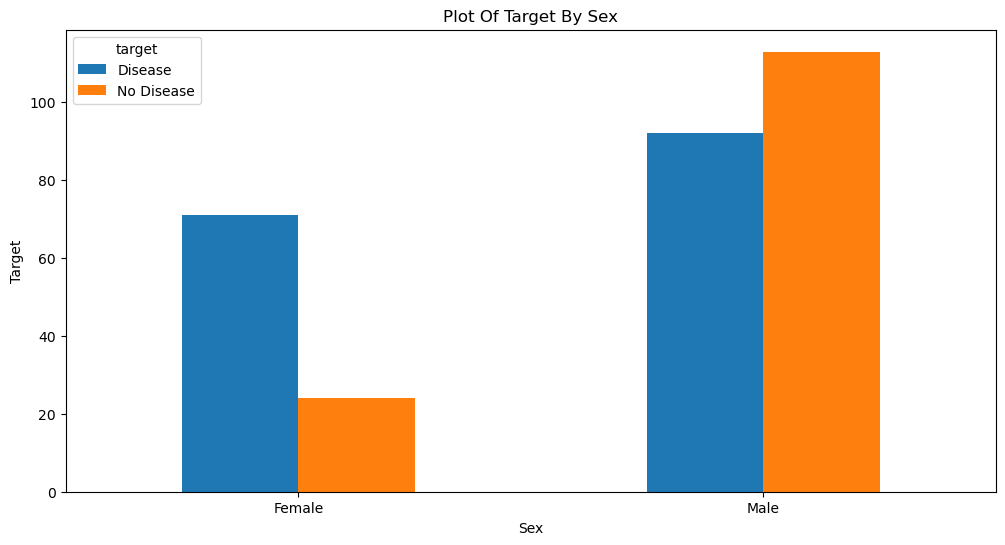

In [27]:
# Plotting target by sex
target_data.groupby(sex_data).value_counts().unstack().plot.bar(figsize=(12,6))
plt.xlabel("Sex")
plt.ylabel("Target")
plt.title("Plot Of Target By Sex")
plt.xticks(rotation=0);

It can be seen from the graph that among the females, there are more individuals with heart disease than those without the disease. But among the males, there are more individuals without heart disease than those with the disease.

In [28]:
# Correlation of some variables
cor=data[['sex','max_hr','target']].corr()
cor

,sex,max_hr,target
sex,1.000000,-0.054871,-0.278841
max_hr,-0.054871,1.000000,0.428683
target,-0.278841,0.428683,1.000000


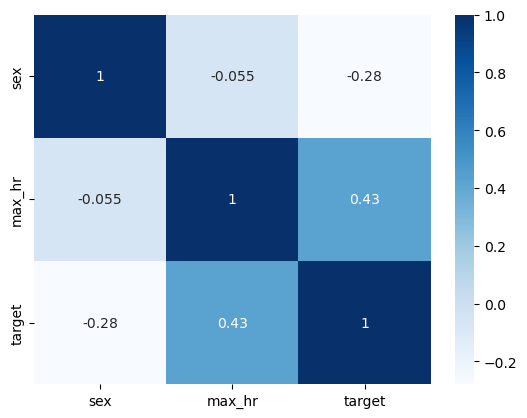

In [29]:
# Plotting correlation among some variables
import seaborn as sns
sns.heatmap(cor,cmap = 'Blues', annot=True);

1. The very weak negative correlation between sex and max_hr indicates that as sex changes,that is, from female to male, the maximum heart rate decreases but very hardly. This show that the maximum heart rate of a person isn't necessarily affected by the sex of the person.

2. The weak negative correlation between sex and target indicates that as sex changes,that is, from female to male, the chance of having heart disease decreases.

3. The moderate positive correlation between max_hr and target indicates that as the maximum heart rate of the person increases, there is a fair chaince of having heart disease.

### DATA PREPROCESSING

In [30]:
data.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


It can be seen that all categorical variables have already been encoded.

In [31]:
# Finding correlation between variables
data.corr()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
age,1.000000,-0.095553,-0.063621,0.282915,0.206558,0.122627,-0.111667,-0.397405,0.094540,0.205844,-0.164588,0.301811,0.063048,-0.222752
sex,-0.095553,1.000000,-0.045082,-0.058444,-0.197782,0.039160,-0.067750,-0.054871,0.138020,0.094571,-0.026954,0.111871,0.212873,-0.278841
chest_pain_type,-0.063621,-0.045082,1.000000,0.046687,-0.073617,0.106182,0.047987,0.301398,-0.389029,-0.144456,0.112198,-0.196135,-0.168199,0.428426
resting_bp,0.282915,-0.058444,0.046687,1.000000,0.124519,0.181279,-0.115801,-0.049065,0.069331,0.194248,-0.122942,0.098451,0.060662,-0.146902
cholestoral,0.206558,-0.197782,-0.073617,0.124519,1.000000,0.017350,-0.147805,-0.007559,0.067042,0.048360,0.000580,0.083797,0.083201,-0.083037
fasting_blood_sugar,0.122627,0.039160,0.106182,0.181279,0.017350,1.000000,-0.092791,-0.011622,0.012590,0.003622,-0.052831,0.151374,-0.008389,-0.017150
restecg,-0.111667,-0.067750,0.047987,-0.115801,-0.147805,-0.092791,1.000000,0.035597,-0.075947,-0.059386,0.096091,-0.083748,-0.012386,0.142079
max_hr,-0.397405,-0.054871,0.301398,-0.049065,-0.007559,-0.011622,0.035597,1.000000,-0.385364,-0.348520,0.392700,-0.232553,-0.116556,0.428683
exang,0.094540,0.138020,-0.389029,0.069331,0.067042,0.012590,-0.075947,-0.385364,1.000000,0.286461,-0.252419,0.127881,0.227082,-0.431575
oldpeak,0.205844,0.094571,-0.144456,0.194248,0.048360,0.003622,-0.059386,-0.348520,0.286461,1.000000,-0.575560,0.235045,0.207699,-0.428568


1. There is a very weak negative correlation between age and chest_pain_type(-0.063621) which implies that as the age of an individual increases, the chest pain type also decreases but very hardly.

2. There is a weak negative correlation between age and max_hr(-0.397405) which implies that as the age increases, maximum heart rate reached during physical activities also decreases but not too much.

3. There is a very weak positive correlation between cholestoral and resting_bp (0.124519) which indicates that as cholestoral levels increases, resting blood pressure also increases but has a low impact.

4. Generally, the correlation between all the variables are between (-0.7 and 0.7) which implies that there are no multicolinearity issues in the data.

### MODEL BUILDING

### Logististic Regression Model

In [32]:
X = data.drop('target', axis = 1)
y = data['target']

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

# Creating a pipeline for the data
pipeline = Pipeline([
    ('f-test', SelectKBest(score_func = f_classif, k = 'all'))
])

# Fitting the pipeline with the data
pipeline.fit(X,y)

Pipeline(steps=[('f-test', SelectKBest(k='all'))])

In [34]:
# Finding F scores and p-values
F_scores = pipeline.named_steps['f-test'].scores_
p_values = pipeline.named_steps['f-test'].pvalues_

scores_data = pd.DataFrame({
    'Feature': X.columns,
    'F score': F_scores,
    'p-value': p_values
})

scores_data = scores_data.sort_values(by = 'p-value', ascending = True)
scores_data

,Feature,F score,p-value
8,exang,68.208858,4.852060e-15
7,max_hr,67.092727,7.696114e-15
9,oldpeak,67.048586,7.838056e-15
2,chest_pain_type,66.994456,8.015724e-15
11,num_major_vessels,60.743402,1.093187e-13
12,thal,45.585412,7.640528e-11
10,slope,39.095509,1.396045e-09
1,sex,25.123638,9.239519e-07
0,age,15.558257,9.980423e-05
3,resting_bp,6.572757,1.084561e-02


The alpha value ($\alpha =0.05$) was chosen for this data. This implies that variables with p-values greater than 0.05 are statistically insignificant. From the table above, it can be seen that only cholestoral and 	fasting_blood_sugar	have a p-value greater than 0.05. This implies that these variables are statistically insignificant. The F-scores for almost all the variables are relatively high indicating that they can explain the dependent variable strongly.

In [35]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (270, 13)
y_train shape: (270,)
X_test shape: (30, 13)
y_test shape: (30,)


In [36]:
# Finding baseline accuracy
base_acc = y_train.value_counts(normalize = True).max()
print('The baseline accuracy is', round(base_acc * 100, 3), '%')

The baseline accuracy is 55.926 %


In [37]:
y_train.value_counts().to_frame()

,count
target,
1,151
0,119


It can be seen from the table above that there are no class imbalance

In [38]:
# Tuning Hyperparameters
hyper_params = {
    'C':[0.001,  0.01, 0.1, 1, 10, 100],
    'penalty':["l1", "l2"],
    'solver': ['liblinear', 'lbfgs'] 
    
}

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_search  = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = hyper_params,
    cv = 5,
    scoring = 'accuracy',
    verbose = 1,
    n_jobs = -1
)
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [40]:
# training on the train dataset
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _che

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [41]:
# Building the model with best the best parameters
best_params = grid_search.best_params_

lin_model = LogisticRegression(max_iter =1000, **best_params)
lin_model

LogisticRegression(C=1, max_iter=1000)

In [42]:
#Trainig the model
lin_model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=1000)

In [43]:
# Predicting on our training dataset
y_predict = lin_model.predict(X_train)
y_predict

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1], dtype=int64)

In [44]:
# Finding the training accuracy
train_acc = lin_model.score(X_train,y_train)
print(f'Training accuracy for the training data is {round(train_acc *100, 2)}%')

Training accuracy for the training data is 86.3%


In [45]:
# Predicting on the testing dataset
y_predict = lin_model.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [46]:
# Finding the testing accuracy
test_acc = lin_model.score(X_test,y_test)
print(f'Testing accuracy for test data: {round(test_acc *100, 2)}%')

Testing accuracy for test data: 86.67%


Since the testing accuracy is greater than the training accuracy, we can conclude that the model is accurate.

In [47]:
from sklearn.metrics import (
    recall_score,
    roc_auc_score,
    f1_score,
    precision_score
)

In [48]:
y_predict_proba = lin_model.predict_proba(X_test)[:, 1]
# Calculating the F1 score
F1_score = f1_score(y_test, y_predict)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_predict_proba)

# Calculate recall (also known as sensitivity or true positive rate)
recall = recall_score(y_test, y_predict)

# Calculate precision score
precision = precision_score(y_test, y_predict)

print(f"F1 Score: {F1_score:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1 Score: 0.8333
AUC-ROC Score: 0.8657
Recall: 0.8333
Precision: 0.8333


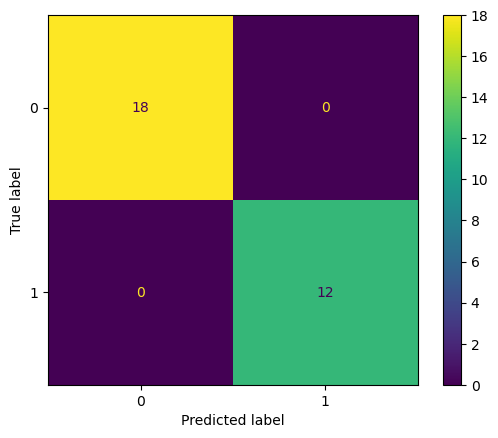

In [49]:
# Create a confusion matrix for model analysis
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(lin_model, X_test, y_predict);

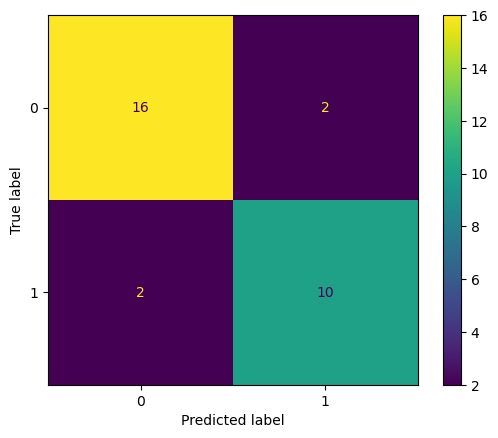

In [50]:
ConfusionMatrixDisplay.from_estimator(lin_model, X_test, y_test);

From the confusion matrix above, we can see that;

1. The model predicted 16 people to not have heart disease which was indeed is accurate.
2. The model predicted 2 people to not have heart disease even though they do have heart disease.
3. The model predicted 2 people to have heart disease even though they actually do not have heart disease.
4. The model predicted 10 people to have heart disease which was indeed accurate.

Therefore, we can conclude that the model is performing fairly well.   

### Building Non-Linear Model

In [51]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (270, 13)
y_train shape: (270,)
X_test shape: (30, 13)
y_test shape: (30,)


In [52]:
# Creating a dictionary with range of hyperparameters for hyperparameter tunning
hyper_params = {
    "max_depth": range(25, 100, 15), 
    "n_estimators": range(10,50,10), 
    'min_samples_split':[15, 50, 5],
    'min_samples_leaf':[1, 2, 3],  
    'max_features':['sqrt','log2'], 
}
hyper_params

{'max_depth': range(25, 100, 15),
 'n_estimators': range(10, 50, 10),
 'min_samples_split': [15, 50, 5],
 'min_samples_leaf': [1, 2, 3],
 'max_features': ['sqrt', 'log2']}

In [53]:
# Creating GridSearchCV to to get the best hyperparameters for the model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
non_lin_model = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 42),
    param_grid = hyper_params,
    cv = 5, # Number of cross validation
    scoring = 'accuracy',
    n_jobs = -1 ,
    verbose = 1
)
non_lin_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(25, 100, 15),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [15, 50, 5],
                         'n_estimators': range(10, 50, 10)},
             scoring='accuracy', verbose=1)

In [54]:
#Fitting the model with the training dataset 
non_lin_model.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(25, 100, 15),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [15, 50, 5],
                         'n_estimators': range(10, 50, 10)},
             scoring='accuracy', verbose=1)

In [55]:
# Building model with best parameters
best_params = non_lin_model.best_params_

non_lin_model = RandomForestClassifier(random_state = 42, **best_params)
non_lin_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=25, min_samples_leaf=2, min_samples_split=50,
                       n_estimators=40, random_state=42)

In [56]:
# Predicting on our training dataset
y_predict = non_lin_model.predict(X_train)
y_predict

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1], dtype=int64)

In [57]:
# Finding the training accuracy
train_acc = non_lin_model.score(X_train,y_train)
print(f'Training accuracy for the training data is {round(train_acc *100, 2)}%')

Training accuracy for the training data is 87.78%


In [58]:
# Predicting on the testing dataset
y_predict = non_lin_model.predict(X_test)
y_predict

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [59]:
# Finding the testing accuracy
test_acc = non_lin_model.score(X_test,y_test)
print(f'Testing accuracy for test data: {round(test_acc *100, 2)}%')

Testing accuracy for test data: 83.33%


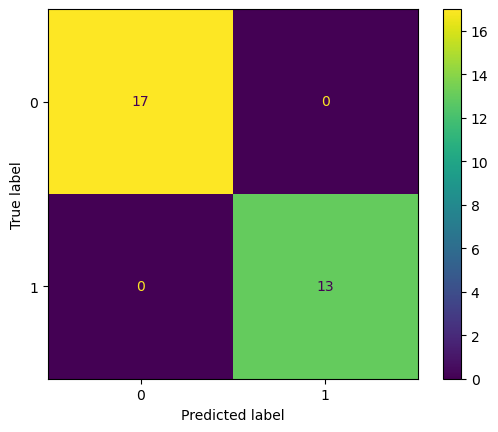

In [60]:
# Create a confusion matrix for model analysis
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(non_lin_model, X_test, y_predict);

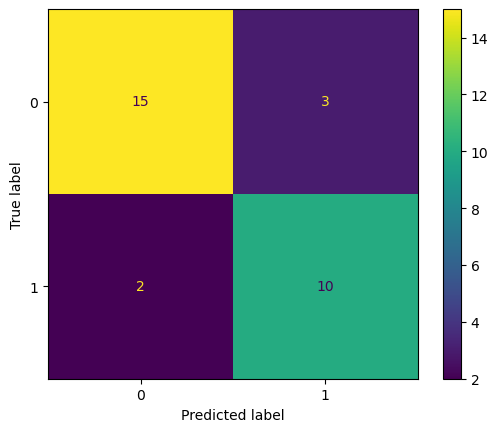

In [61]:
ConfusionMatrixDisplay.from_estimator(non_lin_model, X_test, y_test);

From the confusion matrix above, we can see that;

1. The model predicted 15 people to not have heart disease which was indeed is accurate.
2. The model predicted 2 people to not have heart disease even though they do have heart disease.
3. The model predicted 3 people to have heart disease even though they actually do not have heart disease.
4. The model predicted 10 people to have heart disease which was indeed accurate.

Therefore, we can conclude that the model is performing fairly well.   

In [62]:
y_predict_proba = non_lin_model.predict_proba(X_test)[:, 1]
# Calculating the F1 score
F1_score = f1_score(y_test, y_predict)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_predict_proba)

# Calculate recall (also known as sensitivity or true positive rate)
recall = recall_score(y_test, y_predict)

# Calculate precision score
precision = precision_score(y_test, y_predict)

print(f"F1 Score: {F1_score:.4f}")
print(f"AUC-ROC Score: {auc_roc:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

F1 Score: 0.8000
AUC-ROC Score: 0.8889
Recall: 0.8333
Precision: 0.7692


Comparing the model evaluation metrics for the logistic regression model and random forest classifier, we can conclude that the logistic regression model is the best model among the two.

### MODEL COMMUNICATION

In [64]:
# Finding the odds ratio  for the independent variables
import numpy as np

# Coefficients from the model
coefficients = list(lin_model.coef_[0])

# Corresponding variable names
variables = X.columns

# Creatig a DataFrame for variables and odds ratios
odds_ratio_data = pd.DataFrame({
    'Variable': variables,
    'Odds Ratio': [np.exp(coef) for coef in coefficients]
})

sorted_odds_ratio_data = odds_ratio_data.sort_values(by='Odds Ratio', ascending=True)
sorted_odds_ratio_data

,Variable,Odds Ratio
1,sex,0.261335
12,thal,0.396938
11,num_major_vessels,0.398665
8,exang,0.464574
9,oldpeak,0.545589
3,resting_bp,0.987230
4,cholestoral,0.998604
0,age,0.999755
7,max_hr,1.022661
5,fasting_blood_sugar,1.210502


1. Being male decreases the odds of heart disease by 73.87% compared to being female.

2. Having a certain thalassemia condition decreases the odds of heart disease by 60.31% compared to the baseline.

3. An increase in the number of major vessels decreases the odds of heart disease by 60.13%.

4. Experiencing exercise-induced angina decreases the odds of heart disease by 53.54%.

5. A higher ST depression (oldpeak) decreases the odds of heart disease by 45.46%.

6. A small increase in resting blood pressure decreases the odds of heart disease by about 1.28%.

7. A small increase in cholesterol levels has a negligible effect on the odds of heart disease.

8. Age has almost no effect on the odds of heart disease.

9. For every unit increase in maximum heart rate, the odds of heart disease increase by 2.27%.

10. Having high fasting blood sugar increases the odds of heart disease by 21.95%.

11. Having an abnormal resting ECG increases the odds of heart disease by 68.2%.

12. An increase in the slope of the peak exercise ST segment increases the odds of heart disease by 75.73%.

13. Having a specific type of chest pain increases the odds of heart disease by 129.57% compared to the baseline.